In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c anaconda intel-openmp


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda update -n base -c defaults conda


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

  Using cached numpy-1.23.5-cp38-cp38-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

  Using cached matplotlib-3.7.1-cp38-cp38-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp38-cp38-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached Pillow-9.5.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers


In [10]:
# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))

In [11]:
#Define the generator model
generator = Sequential([
    Dense(7 * 7 * 64, input_dim=100, activation='relu'),
    Reshape((7, 7, 64)),
    Conv2DTranspose(32, kernel_size=3, strides=2, padding='same', activation='relu'),
    Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='sigmoid')
])


In [12]:
#Define Discriminator model
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
#Combine the generator and discriminator into a GAN model
discriminator.trainable = False  # Freeze discriminator weights during GAN training
gan = keras.Sequential([generator, discriminator])

In [14]:
# Compile the discriminator model
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")

# Compile the GAN model
gan.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")


In [15]:
#Define a function to generate random noise for the generator
def generate_random_noise(batch_size, random_noise_dim):
    return np.random.normal(0, 1, (batch_size, random_noise_dim))


In [16]:
# Define the training loop
batch_size = 128
random_noise_dim = 100
epochs = 5



In [17]:
# Training loop
for epoch in range(epochs):
    for i in range(len(x_train) // batch_size):
        # Train the discriminator
        discriminator.trainable = True
        real_images = x_train[i * batch_size : (i + 1) * batch_size]
        real_labels = np.ones((batch_size, 1))
        fake_images = generator.predict(generate_random_noise(batch_size, random_noise_dim))
        fake_labels = np.zeros((batch_size, 1))
        discriminator_loss_real = discriminator.train_on_batch(real_images, real_labels)
        discriminator_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        discriminator_loss = 0.5 * (discriminator_loss_real + discriminator_loss_fake)

        # Train the generator
        discriminator.trainable = False
        random_noise = generate_random_noise(batch_size, random_noise_dim)
        generator_loss = gan.train_on_batch(random_noise, np.ones((batch_size, 1)))

    print(f"Epoch: {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

4/4 [==============================] - 0s 4ms/step
Epoch: 1/5, Discriminator Loss: 1.959066927433014, Generator Loss: 0.03974417224526405
4/4 [==============================] - 0s 5ms/step
Epoch: 2/5, Discriminator Loss: 2.59519225358963, Generator Loss: 0.01067163422703743
4/4 [==============================] - 0s 6ms/step
Epoch: 3/5, Discriminator Loss: 2.945310413837433, Generator Loss: 0.005433563143014908
4/4 [==============================] - 0s 6ms/step
Epoch: 4/5, Discriminator Loss: 3.1665173172950745, Generator Loss: 0.003371182829141617
4/4 [==============================] - 0s 4ms/step
Epoch: 5/5, Discriminator Loss: 3.365096390247345, Generator Loss: 0.0023530758917331696


In [18]:
#Generate sample images using the trained generator
num_samples = 10
random_noise = generate_random_noise(num_samples, random_noise_dim)
generated_images = generator.predict(random_noise)

1/1 [==============================] - 0s 64ms/step


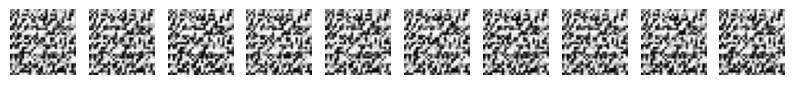

In [19]:
fig, axs = plt.subplots(1, num_samples, figsize=(10, 2))
for i in range(num_samples):
    axs[i].imshow(generated_images[i, :, :, 0], cmap="gray")
    axs[i].axis("off")
plt.show()